# Classify Documents

In [2]:
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load Data

In [3]:
import pandas as pd

df_orig = pd.read_csv("../data/bbc-news-data-embedding.csv", delimiter='\t', index_col=False)

In [4]:
df = df_orig.copy()
df

,category,filename,title,content,embedding
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[-0.0012276918860152364, 0.00733763724565506, ..."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[0.0009311728645116091, 0.014099937863647938, ..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[-0.010487922467291355, 0.009665092453360558, ..."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[0.0111119095236063, 0.004624682944267988, -0...."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[-0.0021637482568621635, 0.005410161800682545,..."
...,...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,"[0.007671569474041462, 0.00624304823577404, -0..."
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,"[0.0026338498573750257, 0.015989987179636955, ..."
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...,"[0.007126151118427515, 0.008495588786900043, -..."
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,"[0.002447678940370679, 0.006076449993997812, -..."


In [5]:
# drop rows with NaN
df.dropna(inplace=True)
len(df)

2217

In [6]:
import numpy as np

# convert string to array
df["embedding"] = df['embedding'].apply(eval).apply(np.array)  

## Reduce dimensionality 
By
- TSNE ref: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE
- PCA ref: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA 

In [6]:
if False:
    from sklearn.manifold import TSNE

    # Create a t-SNE model and transform the data
    tsne = TSNE(n_components=3, perplexity=15, random_state=42, init='random', learning_rate=200)
    vis_dims_tsne = tsne.fit_transform(df['embedding'].to_list())
    vis_dims_tsne.shape

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vis_dims_pca = pca.fit_transform(df['embedding'].to_list())
vis_dims_pca.shape
vis_dims_pca

(2217, 3)

array([[-0.1656545 , -0.07827625, -0.05561796],
       [-0.13891044,  0.0401089 , -0.09734477],
       [-0.12699692,  0.10206724, -0.22343798],
       ...,
       [-0.17195794, -0.06520517,  0.02958185],
       [-0.11224411,  0.06226228,  0.16767483],
       [-0.08868439,  0.03886349, -0.00456145]])

In [8]:
df["vis_dims_pca"] = vis_dims_pca.tolist()
df

,category,filename,title,content,embedding,vis_dims_pca
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[-0.0012276918860152364, 0.00733763724565506, ...","[-0.165654498744229, -0.07827625176977968, -0...."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[0.0009311728645116091, 0.014099937863647938, ...","[-0.13891043703328812, 0.040108902786604186, -..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[-0.010487922467291355, 0.009665092453360558, ...","[-0.1269969150782147, 0.10206724038952321, -0...."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[0.0111119095236063, 0.004624682944267988, -0....","[-0.09432997137566626, 0.0052252047767441644, ..."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[-0.0021637482568621635, 0.005410161800682545,...","[-0.10742613115972643, -0.028975374984860285, ..."
...,...,...,...,...,...,...
2219,tech,396.txt,New consoles promise big problems,Making games for future consoles will require...,"[0.014879594556987286, 0.004789963364601135, -...","[-0.03951052568372149, -0.14439754248439687, 0..."
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,"[0.007671569474041462, 0.00624304823577404, -0...","[-0.1473908202337466, -0.05158864730843363, 0...."
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,"[0.0026338498573750257, 0.015989987179636955, ...","[-0.17195793607653165, -0.06520516544091455, 0..."
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...,"[0.007126151118427515, 0.008495588786900043, -...","[-0.11224410847191402, 0.06226228362764086, 0...."


## Visualise embeddings

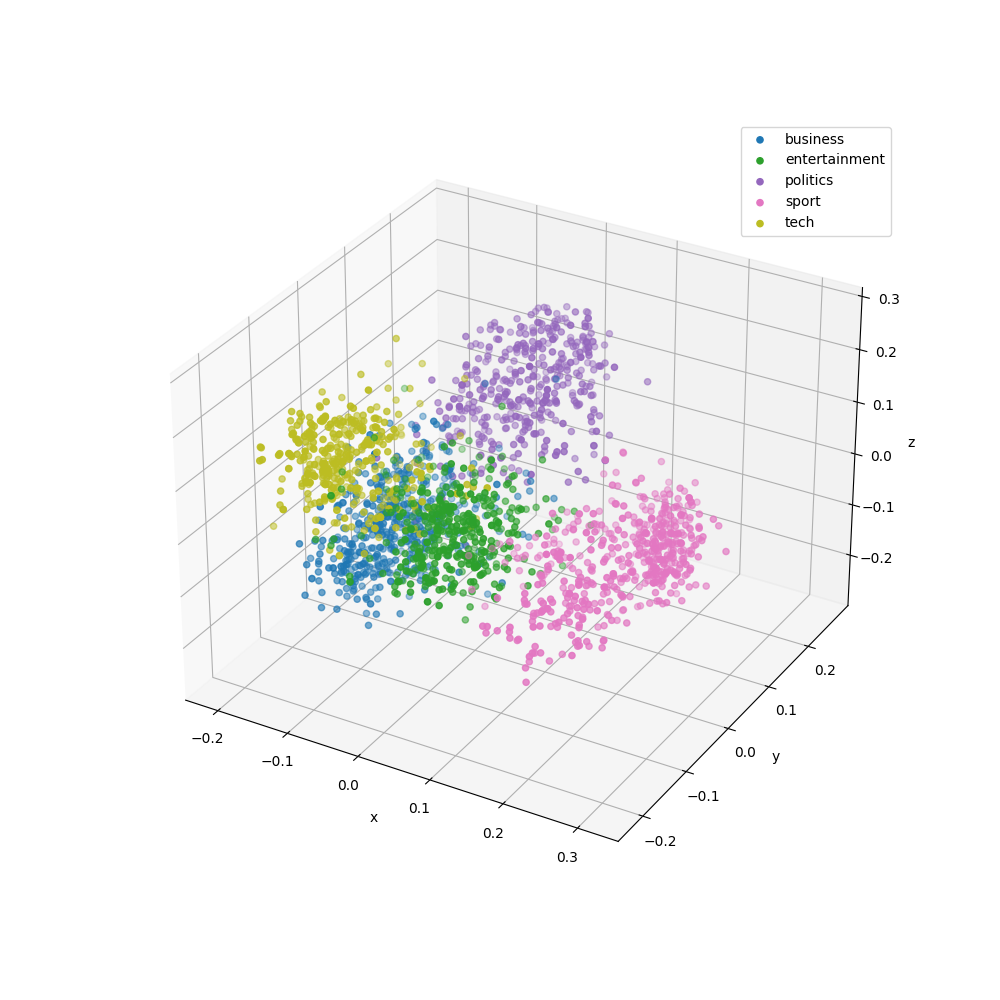

In [11]:
%matplotlib widget  # Interactive Plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

categories = sorted(df['category'].unique())

# Plot each sample category individually
for i, cat in enumerate(categories):
    sub_matrix = np.array(df[df["category"] == cat]["vis_dims_pca"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    _ = ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

_ = ax.set_xlabel('x')
_ = ax.set_ylabel('y')
_ = ax.set_zlabel('z')
_ = ax.legend()

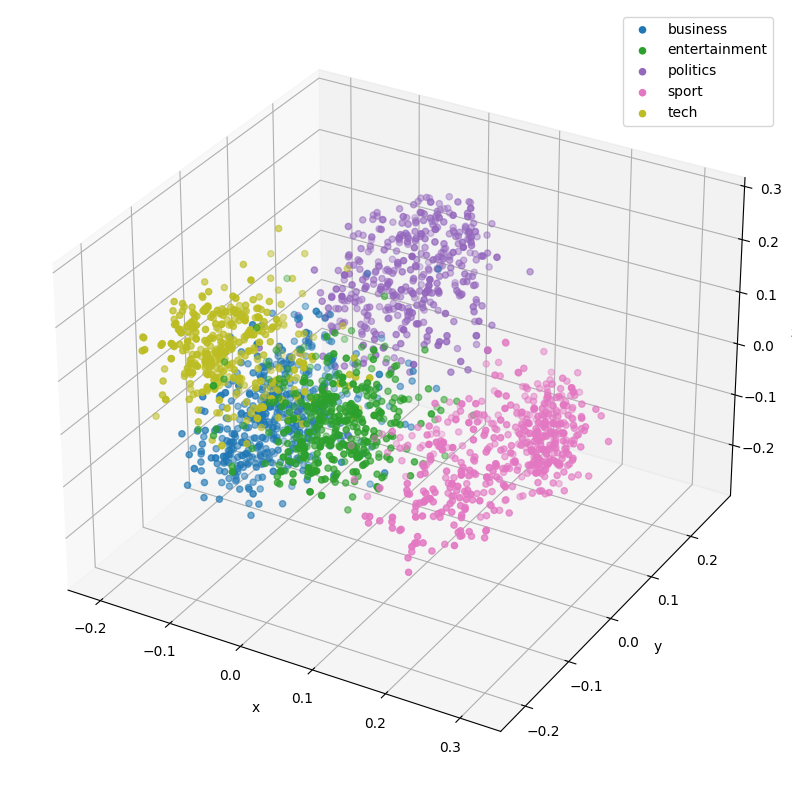

In [24]:
#%matplotlib widget
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

categories = sorted(df['category'].unique())

# Plot each sample category individually
for i, cat in enumerate(categories):
    sub_matrix = np.array(df[df["category"] == cat]["vis_dims_pca"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    _ = ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

_ = ax.set_xlabel('x')
_ = ax.set_ylabel('y')
_ = ax.set_zlabel('z')
_ = ax.legend()